In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

In [3]:
# Fetch the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)


In [4]:
# Extract data and labels
x, y = mnist['data'], mnist['target']

In [5]:
# Display the shape of data and labels
print(f"Data shape: {x.shape}, Labels shape: {y.shape}")

Data shape: (70000, 784), Labels shape: (70000,)


In [6]:
# Convert labels to integer format
y = y.astype(np.int8)

In [7]:
# Select a random digit from the dataset
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)

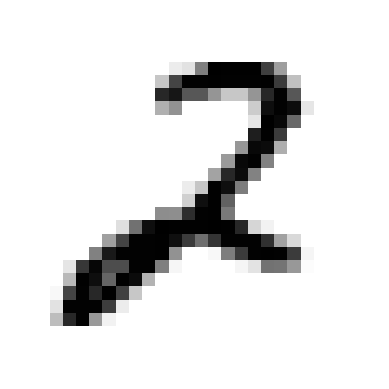

In [8]:
# Plot the image
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [9]:
# Print the label of the selected digit
print(f"Label: {y[36001]}")

Label: 2


In [10]:
# Normalize the feature values (0 to 1)
x = x / 255.0

In [11]:
# Split the data into training and test sets (60k train, 10k test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1429, random_state=42)

print(f"Training set shape: {x_train.shape}, Test set shape: {x_test.shape}")

Training set shape: (59997, 784), Test set shape: (10003, 784)


In [12]:
# Create binary labels for '2' detection
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [13]:
# Check the distribution of the binary labels
print(f"Number of '2' in training set: {np.sum(y_train_2)}")

Number of '2' in training set: 6022


In [14]:
# Train a logistic regression classifier with slight tolerance adjustment
clf = LogisticRegression(max_iter=1000, tol=0.1, solver='lbfgs')
clf.fit(x_train, y_train_2)

LogisticRegression(max_iter=1000, tol=0.1)

In [15]:
# Predict for a test sample (e.g., the 36001st sample)
prediction = clf.predict([some_digit])
print(f"Prediction for 36001st digit: {prediction}")

Prediction for 36001st digit: [False]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [16]:
# Perform cross-validation
cv_scores = cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy: 0.8996


In [17]:
# Predictions on the test set
y_test_pred = clf.predict(x_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_2, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report for precision, recall, f1-score
class_report = classification_report(y_test_2, y_test_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[9035    0]
 [ 968    0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.90      1.00      0.95      9035
        True       0.00      0.00      0.00       968

    accuracy                           0.90     10003
   macro avg       0.45      0.50      0.47     10003
weighted avg       0.82      0.90      0.86     10003



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
